***Semantička segmentacija na skupu podataka LLAMAS***
--
----
**Model**: 

Predtrenirani resnet18 uz maknuti average pool i potpuno povezani sloj te uz dodani konvolucijski sloj (veličina filtera 1x1). Također je napravljeno bilinearno naduzorkovanje nad izlaznim logitima na početnu veličinu, dakle veličinu ulaza.

**Optimizator**: 
  + ADAM uz defaultne parametre

**Funkcija gubtika**: 
  * Cross Entropy Loss za binarnu segmentaciju uz težine (2 klase - odgovor DA, NE)
      + postavljene težine 0.012 za pozadinu i 1.0 za kolničke trakove
        + u prosjeku ima gotovo 80 puta više pozadinskih piksela od piksela kolničkih trakova pa smo za težine uzeli upravo te odnose
      + bolji rezultati su dobiveni uz težinu 0.15 za pozadinske piksele i 1.0 za piksele kolničkih trakova
  * Cross Entropy Loss za običnu semantičku segmentaciju (5 klasa - 4 trake + ostalo)

**Metrika**: F1 - jer je veliki broj pozadinskih piksela koji nam nisu bitni

**Skup podataka**:
*   Train - 58k slika, velčina 1276x717 piksela, smanjeno na 638x359 piksela
*   Valid - 10k slika, veličina 1276x717 piksela, smanjeno na 638x359 piksela
*   Test - 10k slika, veličina 1276x 717 piksela, smanjeno na 638x359 piksela
*   Labele - crno bijele, oznacene po ids, 0 i 1 za binarnu, 0-4 za običnu segmentaicju

**Ostali parametri**:
  * Batch size: 12
  * Broj epoha: 20 uz manji test, 2 uz veci jer Colab prekida
  * Vrijeme potrebno za svaku epohu: 1.5 min za manji test, 20 min za veci test

**Napomena**: 

Treniranje sam odlučila isprobati i na manjem skupu od 2400 slika pa uz više epoha, ali rezultati su isti kao i kad prolazim kroz cijeli set, ovo je samo provedeno radi vremenske i memorijske efikasnosti. Također, slike su smanjenje bilinerano, a labele uz nearest.

**Novi rezultati uz odrezane slike**:

Binarna segmentacija uz težine (0.4, 1.0):
  + Train: gubitak = 0.08, točnost = 37% (uz metriku F1), IoU = 24%
  + Test: gubitak = 0.07 , točnost = 35% (uz metriku F1), IoU = 21%


**Rezultati**:

Binarna segmentacija uz težine (0.012, 1.0):
  + Train: gubitak = 0.13, točnost = 22% (uz metriku F1), IoU = 12%
  + Test: gubitak = 0.4 , točnost = 15% (uz metriku F1), IoU = 10%

Binarna segmantcija uz težine (0.15, 1.0):
  + Train: gubitak = 0.08, točnost = 43% (uz metriku F1), IoU = 28%
  + Test: gubitak = 0.11, točnost =  34% (uz metriku F1), IoU = 20%

Binarna segmantcija uz težine (0.3, 1.0):
  + Train: gubitak = 0.06, točnost = 40% (uz metriku F1), IoU = 24%
  + Test: gubitak = 0.09, točnost =  30% (uz metriku F1), IoU = 18%

Multi class segmentacija uz težine (0.15, 1.0, 1.0, 1.0, 1.0):
  + Train: gubitak = 0.07, točnost = 30% (uz metriku F1), mIoU = %
  + Test: gubitak = 0,07, točnost =  22% (uz metriku F1), mIoU = %

Multi class segmentacija uz težine (0.3, 1.0, 1.0, 1.0, 1.0):
  + Train: gubitak = 0.04, točnost = 25% (uz metriku F1), mIoU = %
  + Test: gubitak = 0.06, točnost =  20% (uz metriku F1), mIoU = %

**Zaključak**: 

  + Eksperiment s težinama dao je bolje rezultate, točnost se podignula na dvadesetak posto, vidljive su i promjene te klase na slici predikcije, a loss se smanjio na 0.09.
  + Eksperiment s focal lossom nije dao nista bolje rezultate od prijasnjih, pokusala sam i kombinaciju  focal lossa i cross entropy uz težine na binarnom setu, ali bolji rezultati su se pokazali za cross entropy s tezinama.
  + I dalje je problem veliki broj pozadinskih piksela koji predstavljaju preveliki disbalans između klasa.


Usporedba rezultata:
Lijeva slika je uz unakrsnu entropiju i težine, a desna slika je uz focal loss. Treća je unakrsna entropija uz težine za multi class.

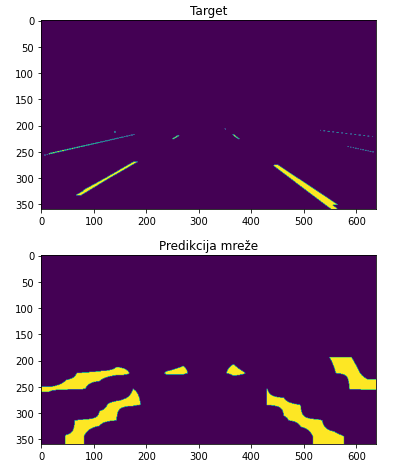
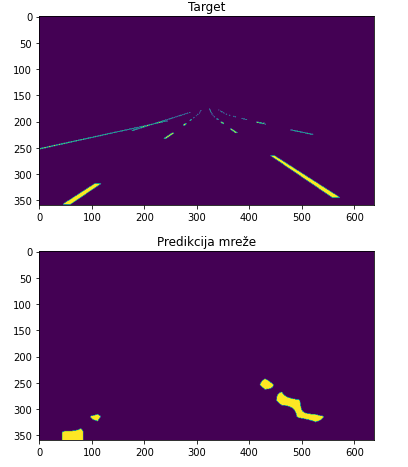

Sljedeća slika prikazuje multiclass uz CE s težinama:

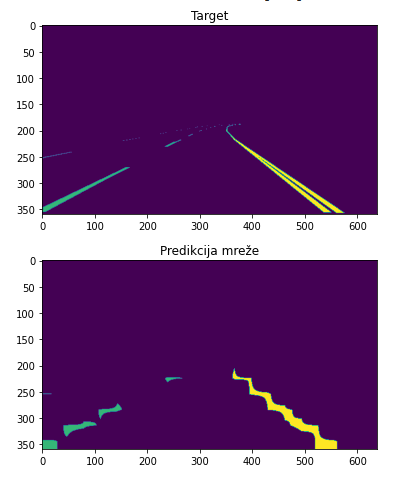

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

"\nfrom google.colab import drive\ndrive.mount('/content/drive/')\n"

In [ ]:
# Kompletan set za treniranje i labele
#!unzip '/content/drive/My Drive/LLAMAS/train_all_labels_small_ids.zip'
#!unzip '/content/drive/My Drive/LLAMAS/train_small_bil.zip'
# Smanjeni set za treniranje i labele
!unzip '/content/drive/My Drive/LLAMAS/train_labels_small_ids.zip'
!unzip '/content/drive/My Drive/LLAMAS/train_sort_small_bilinear.zip'
# Set za validiranje i labele
!unzip '/content/drive/My Drive/LLAMAS/valid_small_bilinear.zip'
!unzip '/content/drive/My Drive/LLAMAS/valid_labels_01.zip'
# Set za testiranje
!unzip '/content/drive/My Drive/LLAMAS/test_small_bilinear.zip'
!unzip '/content/drive/My Drive/LLAMAS/test_small_ids.zip'

"\n# Kompletan set za treniranje i labele\n#!unzip '/content/drive/My Drive/LLAMAS/train_all_labels_small_ids.zip'\n#!unzip '/content/drive/My Drive/LLAMAS/train_small_bil.zip'\n# Smanjeni set za treniranje i labele\n!unzip '/content/drive/My Drive/LLAMAS/train_labels_small_ids.zip'\n!unzip '/content/drive/My Drive/LLAMAS/train_sort_small_bilinear.zip'\n# Set za validiranje i labele\n!unzip '/content/drive/My Drive/LLAMAS/valid_small_bilinear.zip'\n!unzip '/content/drive/My Drive/LLAMAS/valid_labels_01.zip'\n# Set za testiranje\n#!unzip '/content/drive/My Drive/LLAMAS/test_small_bilinear.zip'\n#!unzip '/content/drive/My Drive/LLAMAS/test_small_ids.zip'\n# Smanjeni set za treniranje multi class\n#!unzip '/content/drive/My Drive/LLAMAS/train_labels_small_ids_multi.zip'\n# Validiranje multiclass\n#!unzip '/content/drive/My Drive/LLAMAS/valid_multi_class_ids.zip'\n\n"

In [ ]:
import torch
import torch.nn as nn
from PIL import Image
import numpy as np
import torchvision
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import time
import numpy as np
import math
import glob
from torchvision.models.resnet import ResNet, BasicBlock
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from torch.utils.model_zoo import load_url as loading
from torch.autograd import Variable
from sklearn import metrics

'\ntry:\n  from torch.hub import load_state_dict_from_url\nexcept ImportError:\n  from torch.utils.model_zoo import load_url as load_url'

In [ ]:
model_urls = {
    'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
    'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth',
    'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
    'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
    'resnet152': 'https://download.pytorch.org/models/resnet152-b121ed2d.pth',
    'resnext50_32x4d': 'https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth',
    'resnext101_32x8d': 'https://download.pytorch.org/models/resnext101_32x8d-8ba56ff5.pth',
    'wide_resnet50_2': 'https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth',
    'wide_resnet101_2': 'https://download.pytorch.org/models/wide_resnet101_2-32ee1156.pth',
}

In [ ]:
def conv3x3(in_planes, out_planes, stride=1, groups=1, dilation=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=dilation, groups=groups, bias=False, dilation=dilation)


In [ ]:
def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)

In [ ]:
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(BasicBlock, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        if groups != 1 or base_width != 64:
            raise ValueError('BasicBlock only supports groups=1 and base_width=64')
        if dilation > 1:
            raise NotImplementedError("Dilation > 1 not supported in BasicBlock")
        # Both self.conv1 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = norm_layer(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


In [ ]:
class Bottleneck(nn.Module):
    # Bottleneck in torchvision places the stride for downsampling at 3x3 convolution(self.conv2)
    # while original implementation places the stride at the first 1x1 convolution(self.conv1)
    # according to "Deep residual learning for image recognition"https://arxiv.org/abs/1512.03385.
    # This variant is also known as ResNet V1.5 and improves accuracy according to
    # https://ngc.nvidia.com/catalog/model-scripts/nvidia:resnet_50_v1_5_for_pytorch.

    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(Bottleneck, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        width = int(planes * (base_width / 64.)) * groups
        # Both self.conv2 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv1x1(inplanes, width)
        self.bn1 = norm_layer(width)
        self.conv2 = conv3x3(width, width, stride, groups, dilation)
        self.bn2 = norm_layer(width)
        self.conv3 = conv1x1(width, planes * self.expansion)
        self.bn3 = norm_layer(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


In [ ]:
class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes=1000, zero_init_residual=False,
                 groups=1, width_per_group=64, replace_stride_with_dilation=None,
                 norm_layer=None):
        super(ResNet, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self._norm_layer = norm_layer

        self.inplanes = 64
        self.dilation = 1
        if replace_stride_with_dilation is None:
            # each element in the tuple indicates if we should replace
            # the 2x2 stride with a dilated convolution instead
            replace_stride_with_dilation = [False, False, False]
        if len(replace_stride_with_dilation) != 3:
            raise ValueError("replace_stride_with_dilation should be None "
                             "or a 3-element tuple, got {}".format(
                                 replace_stride_with_dilation))
        self.groups = groups
        self.base_width = width_per_group
        self.conv1 = nn.Conv2d(1, self.inplanes, kernel_size=7, stride=2, 
                               padding=3,bias=False)
        self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2,
                                       dilate=replace_stride_with_dilation[0])
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2,
                                       dilate=replace_stride_with_dilation[1])
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2,
                                       dilate=replace_stride_with_dilation[2])
        # self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        # self.fc = nn.Linear(512 * block.expansion, num_classes)
        self.conv2 = nn.Conv2d(512, 2, kernel_size=1, stride=1, 
                               bias=False)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(self, block, planes, blocks, stride=1, dilate=False):
        norm_layer = self._norm_layer
        downsample = None
        previous_dilation = self.dilation
        if dilate:
            self.dilation *= stride
            stride = 1
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                norm_layer(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample, self.groups,
                            self.base_width, previous_dilation, norm_layer))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes, groups=self.groups,
                                base_width=self.base_width, dilation=self.dilation,
                                norm_layer=norm_layer))

        return nn.Sequential(*layers)

    def _forward_impl(self, x):
        # See note [TorchScript super()]
        B, C, H, W = x.shape
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        # x = self.avgpool(x)
        # x = torch.flatten(x, 1)
        # x = self.fc(x)
        x = self.conv2(x)

        return torch.nn.functional.interpolate(x, size=(H,W), mode='bilinear')

    def forward(self, x):
        return self._forward_impl(x)

In [ ]:
def _load_pretrained(model, url, inchans=3):
    state_dict = loading(url)
    if inchans == 1:
        conv1_weight = state_dict['conv1.weight']
        state_dict['conv1.weight'] = conv1_weight.sum(dim=1, keepdim=True)
    elif inchans != 3:
        assert False, "Invalid number of inchans for pretrained weights"
    model.load_state_dict(state_dict, strict=False)

def resnet18(pretrained=False, inchans=3):
    """Constructs a ResNet-50 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(BasicBlock, [2, 2, 2, 2])
    if pretrained:
        _load_pretrained(model, model_urls['resnet18'], inchans=inchans)
    return model

In [ ]:
class LlamasDataset(Dataset):
    """LLAMAS dataset for lane tracking."""
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    def __init__(self,im_root, label_root):
        self.images = list(sorted(glob.glob(im_root+'*.png')))
        self.im_root = im_root
        self.labels = list(sorted(glob.glob(label_root+'*.png')))
        self.label_root = label_root
        self.resize = transforms.Resize((359, 638))
        self.normalize = transforms.Normalize([0.5],[0.5])
        self.tenzoriraj = transforms.ToTensor()
        self.area = (0, 159, 638, 359)
    def transforms(self, image, label=None):
          image = image.crop(self.area)
          image = self.tenzoriraj(image)
          image = self.normalize(image)

          label = label.crop(self.area)
          label = np.array(label)
          label = torch.tensor(label)

          return image, label
    
    def __len__(self):
        return len(self.images)

    def __getitem__(self, item):
        image = Image.open(self.images[item])
        label= Image.open(self.labels[item])
        return self.transforms(image, label)

In [ ]:
train_root = 'train_sort_small_bilinear/'
label_root = 'train_labels_small_ids/'

test_root = 'test_small_bilinear/'
test_labels_root = 'test_small_ids/'

valid_root = 'valid_small/'
valid_labels_root = 'valid_labels_01/'

device = torch.device('cuda')
epochs = 45
batch_size = 12

In [ ]:
dataset_train = LlamasDataset(im_root=train_root, label_root=label_root)
train_loader = DataLoader(dataset=dataset_train, batch_size=batch_size, shuffle=True, num_workers=2)

dataset_test = LlamasDataset(im_root=test_root, label_root=test_labels_root)
test_loader = DataLoader(dataset=dataset_test, batch_size=batch_size, shuffle=False, num_workers=2)

dataset_valid = LlamasDataset(im_root=valid_root, label_root=valid_labels_root)
valid_loader = DataLoader(dataset=dataset_valid, batch_size=batch_size, shuffle=True, num_workers=2)

In [ ]:
network = resnet18(pretrained=True, inchans=1)
weights = torch.tensor([0.4, 1.0]).to(device)
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = optim.Adam(network.parameters())
network.to(device)

In [ ]:
def train(epoch):
    network.train()
    correct = 0
    cor = 0
    iou = 0
    total = len(train_loader.dataset) / 12
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        target = target.squeeze(1)
        target = target.type(torch.cuda.LongTensor)
       
        optimizer.zero_grad()
        output = network(data)
       
        pred = torch.argmax(output.data, dim=1)
        pred = pred.squeeze(1)
       
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        target_np = target.cpu()
        target_np = target_np.numpy()
        target_np = np.reshape(target_np, (target_np.shape[1]*target_np.shape[2]*target_np.shape[0],1))
        
        pred_np = pred.cpu()
        pred_np = pred_np.numpy()
        pred_np = np.reshape(pred_np, (pred_np.shape[1]*pred_np.shape[2]*pred_np.shape[0],1))
        correct += metrics.f1_score(target_np, pred_np, average='binary', zero_division=1)
        iou += metrics.jaccard_score(target_np, pred_np, average='binary')

    print('Train| Epoch {}| Loss: {:.6f}| Accuracy: {:.6f}%| IoU: {:.6f}%'.format(
            epoch, loss.item(), 100.*correct/total, 100.*iou/total))


In [ ]:
def valid(epoch):
    network.eval()
    valid_loss = 0
    correct = 0
    cor =0
    iou = 0
    total_valid = len(valid_loader.dataset) / 12
    with torch.no_grad():
        for data, target in valid_loader:
            data, target = data.to(device), target.to(device)
            target = target.squeeze(1)
            target = target.type(torch.cuda.LongTensor)
            output = network(data)
            valid_loss += criterion(output, target).item()

            target_np = target.cpu()
            target_np = target_np.numpy()
            target_np = np.reshape(target_np, (target_np.shape[1]*target_np.shape[2]*target_np.shape[0],1))
            
            pred = output.data.max(1, keepdim=True)[1]
            pred_np = pred.cpu()
            pred_np = pred_np.squeeze(1)
            pred_np = pred_np.numpy()
            pred_np = np.reshape(pred_np, (pred_np.shape[1]*pred_np.shape[2]*pred_np.shape[0],1))
            iou += metrics.jaccard_score(target_np, pred_np, average='binary')
            correct += metrics.f1_score(target_np, pred_np, average='binary', zero_division=1)
    valid_loss /= total_valid
    iou /= total_valid
    correct /= total_valid
    print('Valid| Epoch {}| Avg. loss: {:.4f}| Accuracy: {}/{} ({:.4f}%| IoU: {:.4f}%)'.format(
    epoch, valid_loss, correct, total_valid,
    100.*correct, 100.*iou))

In [ ]:
def test():
    network.eval()
    test_loss = 0
    correct = 0
    iou = 0
    total_test = round(len(test_loader.dataset) / 12)
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            target = target.squeeze(1)
            target = target.type(torch.cuda.LongTensor)
            output = network(data)
            
            test_loss += criterion(output, target).item()
            
            target_np = target.cpu()
            target_np = target_np.numpy()
            target_np = np.reshape(target_np, (target_np.shape[1]*target_np.shape[2]*target_np.shape[0],1))
            
            pred = output.data.max(1, keepdim=True)[1]
            pred_np = pred.cpu()
            iou += ioup(pred, target.squeeze(1))
            pred_np = pred_np.squeeze(1)
            pred_np = pred_np.numpy()
            pred_np = np.reshape(pred_np, (pred_np.shape[1]*pred_np.shape[2]*pred_np.shape[0],1))
            iou += metrics.jaccard_score(target_np, pred_np, average='binary')
            correct += metrics.f1_score(target_np, pred_np, average='binary', zero_division=1)
    test_loss /= total_test
    iou /= total_test
    correct /= total_test
    print('Test| Epoch {}| Avg. loss: {:.4f}| Accuracy: {}/{} ({:.2f}%)| mIoU : {:.4f}%'.format(
    epoch, test_loss, correct, total_test,
    100.*correct, 100.*iou))

In [ ]:
for epoch in range(1, epochs + 1):
    time0 = time.time()
    train(epoch)
    print("Running time for Epoch {}: {} min\n".format(epoch, (time.time() - time0)/60))
    valid(epoch)

In [ ]:
test()

In [ ]:
valid_loader2 = DataLoader(dataset=dataset_test, batch_size=1, shuffle=True, num_workers=2)

dataiter = iter(valid_loader2)
sljed = dataiter.next()
slika, tar = sljed

with torch.no_grad():
          data, target = slika.to(device), tar.to(device)
          target = tar.squeeze(1)
          target = target.type(torch.cuda.LongTensor)
          output = network(data)
  
izlaz = pred.squeeze(0)
izlaz = izlaz.squeeze(0)
izlaz = izlaz.cpu()
izlaz = izlaz.numpy()
izlaz = izlaz.astype(np.uint8)

tar = target.squeeze(0)
tar = tar.cpu()
tar = tar.numpy()
tar = tar.astype(np.uint8)

plt.figure()
plt.imshow(tar)
plt.title('Target')
plt.show()

plt.figure()
plt.imshow(izlaz)
plt.title('Predikcija mreže')
plt.show()